# 1-D dynamical systems in neuroscience

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from cycler import cycler
import seaborn as sns

palette = sns.color_palette("Set2")
plt.rc('axes', prop_cycle=cycler(color=palette))
plt.style.use(['science', 'grid', 'custom'])

## I-V relations and dynamics

Consider a simplified version of the Hodgkin-Huxley model where we describe the voltage dynamics ($V$) and gating dynamics ($p$). We can reduce this system to one-dimension by **assuming the gating process is instantaneous**. For easy comparison we also consider a system without gating dynamics, i.e. $m_{\infty}(V) = 1$
<br>
<br>

### model neuron with no gating dynamics
<br>
$$I(V) = C \frac{dV}{dt} = I - g_{L}(V - E_{L})$$
<br>

### model neuron with gating dynamics (persistent sodium model with instantaneous current $I_{Na,p} $)
<br>
$$I(V) = C \frac{dV}{dt} = I - g_{L}(V - E_{L}) -g_{Na}m_{\infty}(V)(V - I_{Na})$$  
<br>

where the gating variable $m$ is modelled as
<br>
$$m_{\infty}(V) = \frac{1}{1 + \exp{(\frac{V_{1/2} - V}{k}})}$$
<br>



In [3]:
# defining biophysical neuron parameters based on experimental values obtained from layer 5 pyramidL cells in a rats visual cortex (p. 56)

C = 10 #uF
I = 0 #pA

g_L = 19 #mS
E_L = -67 #mV

g_Na = 74 #mS
E_Na = 60 #mV
V_half = 1.5 #mV

k = 16 #mV

In [4]:
# defining boltzmann function

def boltzmann(V, V_half, k):
    return 1/(1 + np.exp((V_half - V)/k))


Here we consider $F(V) = \dot{V} = \frac{-I(V)}{C}$

In [63]:
V = np.linspace(-100, 50, 1000)

# no gating dynamics
def I1(V, I_ext):
    I_Leak = g_L*(V - E_L)
    return I_ext - I_Leak

def F1(V, I_ext):
    return I1(V, I_ext)/C

# with gating dynamics
def I2(V, I_ext):
    I_Leak = g_L*(V - E_L)
    I_Na = g_Na*(V - E_Na)
    m_inf = boltzmann(V, V_half, k)
    return I_ext - (I_Leak + I_Na*m_inf)

def F2(V, I_ext):
    return I2(V, I_ext)/C
    

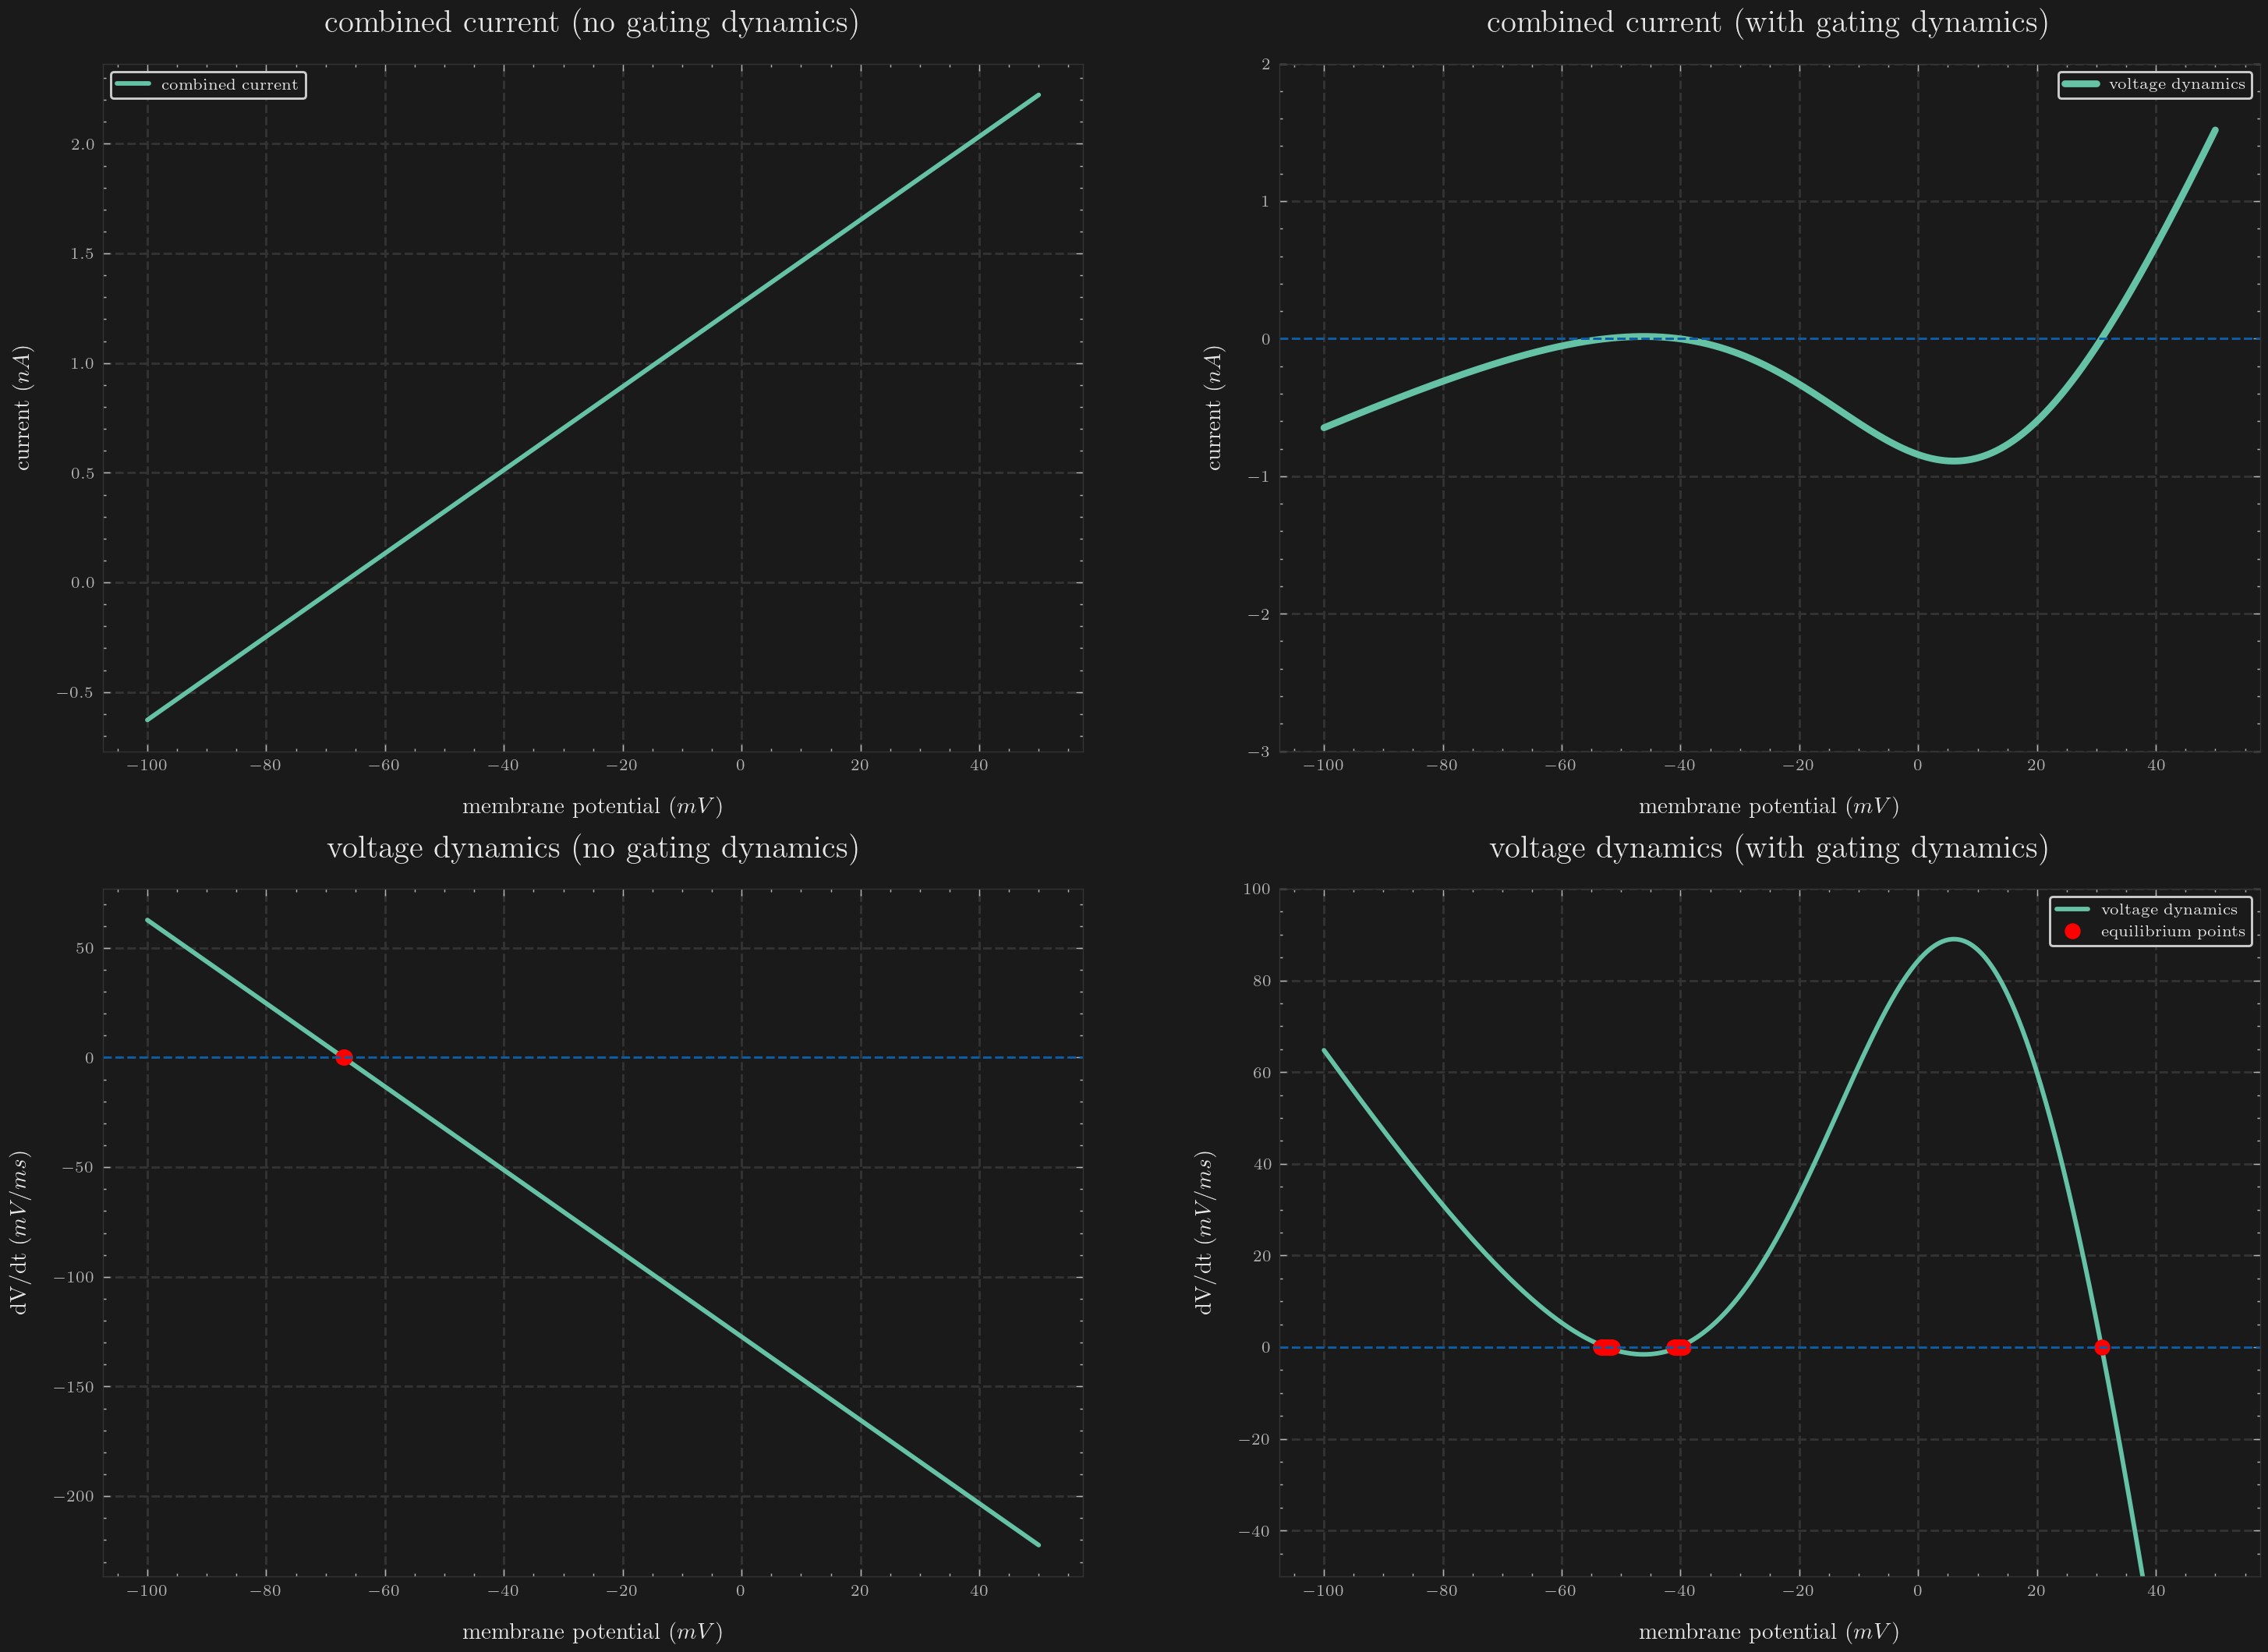

<Figure size 1152x864 with 0 Axes>

In [70]:
I_ext = 0

tolerance = 0.5
equilibrium_indices1 = np.where(np.abs(F1(V, I_ext)) < tolerance)[0]
equilibrium_points1 = V[equilibrium_indices1]
equilibrium_indices2 = np.where(np.abs(F2(V, I_ext)) < tolerance)[0]
equilibrium_points2 = V[equilibrium_indices2]

fig1, ax1 = plt.subplots(2,2,figsize=(17,12), dpi = 210)

for row in ax1:
    for ax in row:
        ax.set_prop_cycle(cycler(color=palette))

ax1[0,0].plot(V, -I1(V, I_ext)/1000, label = 'combined current', linewidth = 2)
ax1[0,0].set_ylabel('current ($nA$)')
ax1[0,0].set_xlabel('membrane potential ($mV$)')
ax1[0,0].set_title('combined current (no gating dynamics)')
ax1[0,0].legend()

ax1[0,1].plot(V, -I2(V, I_ext)/1000, label = 'voltage dynamics', linewidth = 3)
ax1[0,1].axhline(0, linestyle = '--')
ax1[0,1].set_ylabel('current ($nA$)')
ax1[0,1].set_xlabel('membrane potential ($mV$)')
ax1[0,1].set_ylim(-3, 2)
ax1[0,1].set_title('combined current (with gating dynamics)')
ax1[0,1].legend()

ax1[1,0].plot(V, F1(V, I_ext), label = 'voltage dynamics', linewidth = 2)
ax1[1,0].plot(equilibrium_points1, np.zeros_like(equilibrium_points1), 'ro', label='equilibrium points')
ax1[1,0].axhline(0, linestyle = '--')
ax1[1,0].set_ylabel('dV/dt ($mV/ms$)')
ax1[1,0].set_xlabel('membrane potential ($mV$)')
ax1[1,0].set_title('voltage dynamics (no gating dynamics)')

ax1[1,1].plot(V, F2(V, I_ext), label = 'voltage dynamics', linewidth = 2)
ax1[1,1].plot(equilibrium_points2, np.zeros_like(equilibrium_points2), 'ro', label='equilibrium points')
ax1[1,1].axhline(0, linestyle = '--')
ax1[1,1].set_ylabel('dV/dt ($mV/ms$)')
ax1[1,1].set_xlabel('membrane potential ($mV$)')
ax1[1,1].set_ylim(-50, 100)
ax1[1,1].set_title('voltage dynamics (with gating dynamics)')

plt.legend()
plt.show()
plt.clf()
plt.tight_layout()

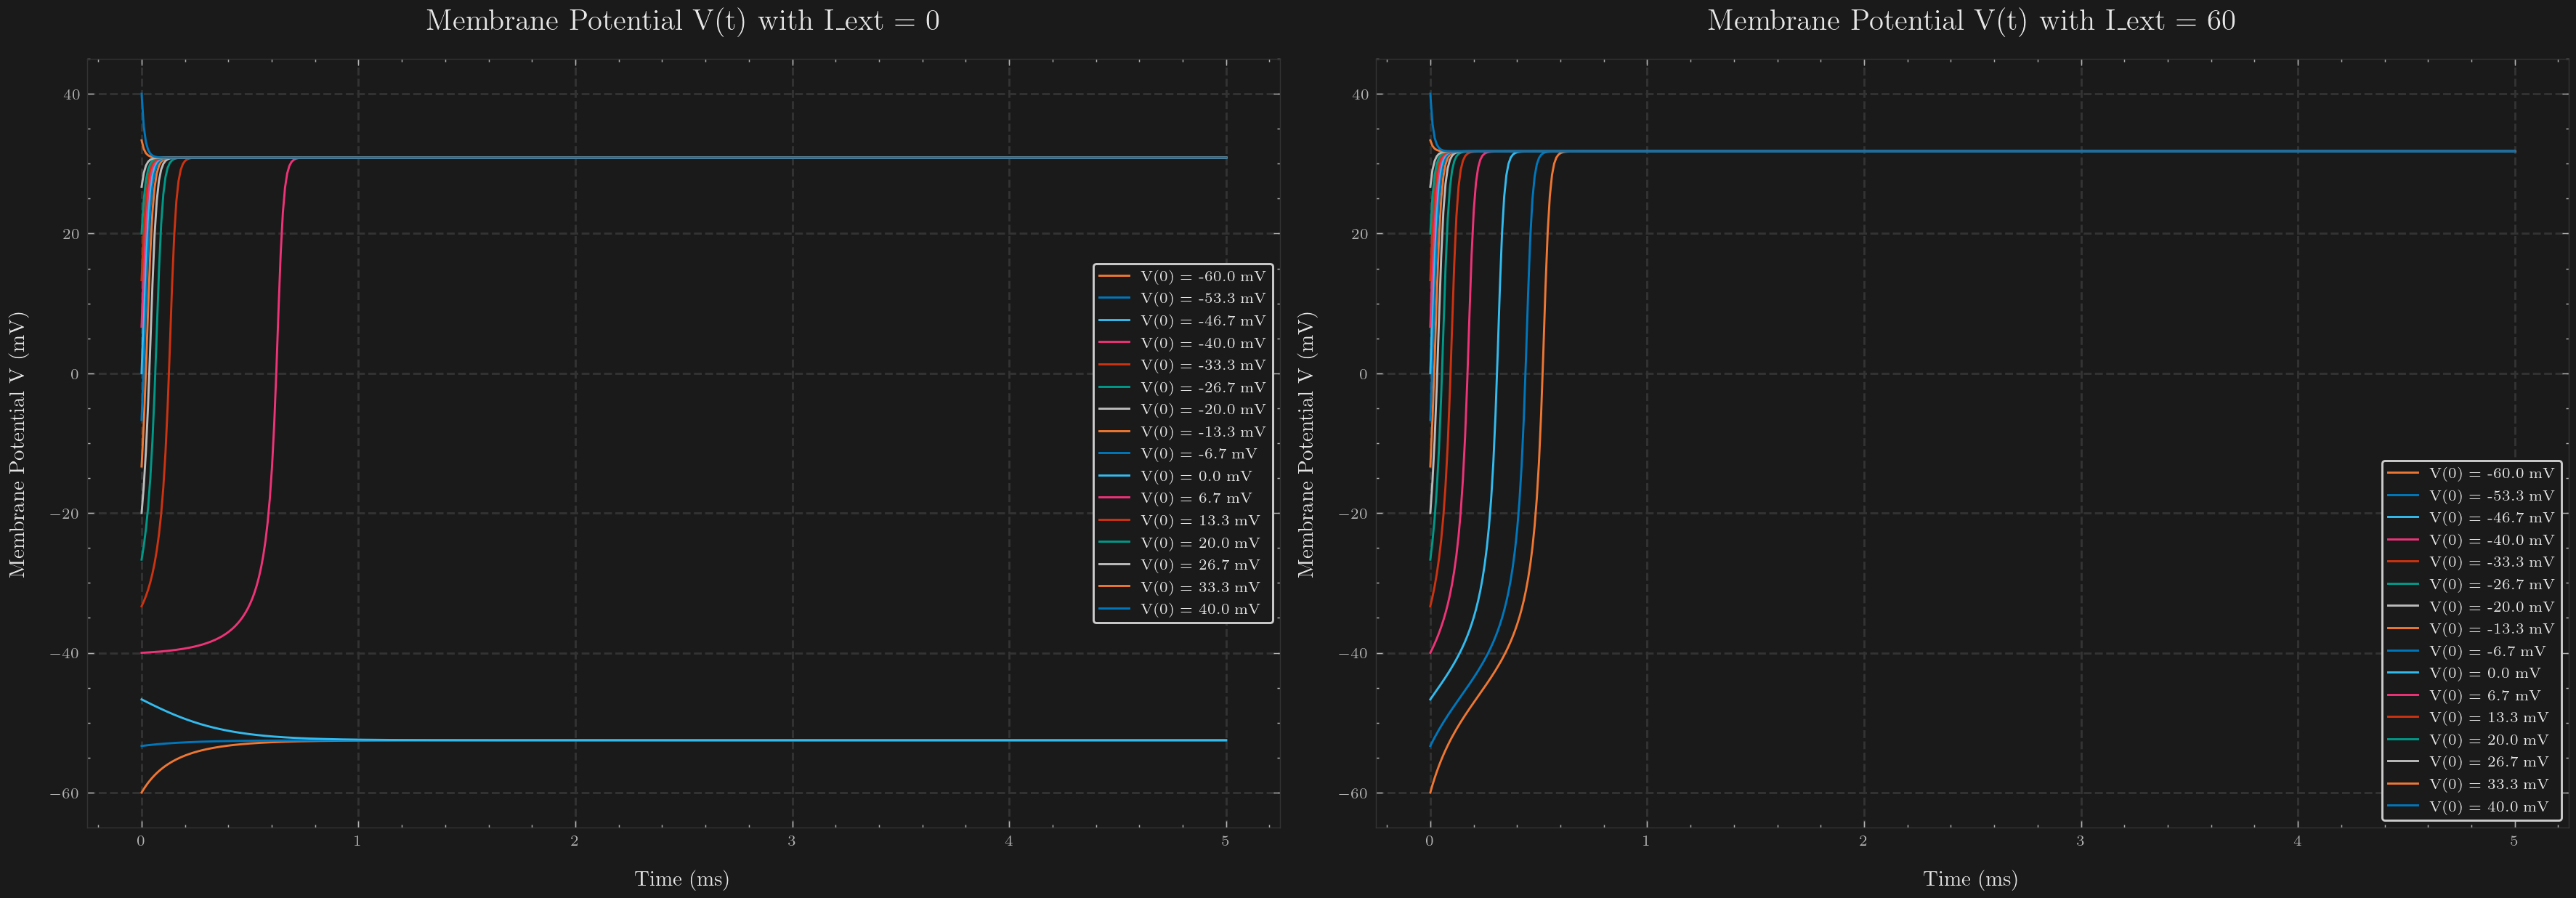

In [15]:
from scipy.integrate import odeint

# define the ODE dV/dt = -I(V)
def dV_dt(V, t, I_ext):
    return I_ext - I(V)

# time points to solve the ODE
t = np.linspace(0, 5, 500)

# initial conditions: 16 values between -60 mV and +60 mV
initial_conditions = np.linspace(-60, 40, 16)

# Create subplots
fig2, ax2 = plt.subplots(1, 2, figsize=(17, 6), dpi = 210)

for V0 in initial_conditions:
    V_t = odeint(dV_dt, V0, t, args=(0,))  # I_ext = 0
    ax2[0].plot(t, V_t, label=f'V(0) = {V0:.1f} mV')

ax2[0].set_title('Membrane Potential V(t) with I_ext = 0')
ax2[0].set_xlabel('Time (ms)')
ax2[0].set_ylabel('Membrane Potential V (mV)')
ax2[0].grid(True)

# Plot for I_ext = 60
for V0 in initial_conditions:
    V_t = odeint(dV_dt, V0, t, args=(60,))  # I_ext = 60
    ax2[1].plot(t, V_t, label=f'V(0) = {V0:.1f} mV')

ax2[1].set_title('Membrane Potential V(t) with I_ext = 60')
ax2[1].set_xlabel('Time (ms)')
ax2[1].set_ylabel('Membrane Potential V (mV)')
ax2[1].grid(True)

# Add legends and adjust layout
ax2[0].legend(loc='best')
ax2[1].legend(loc='best')
plt.tight_layout()
plt.show()